In [1]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()

# sepal legth, sepal width
x = iris.data[:100, :2]
y = iris.target[:100]

In [3]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [6]:
svc = LinearSVC(dual="auto")
model = svc.fit(x_scale, y)

In [ ]:
def hyperplane_graph(x_scale, y, svc):
    # y의 값이 0 : 빨강 / 1 : 파랑
    color = ["red" if c == 0 else "blue" for c in y]
    plt.scatter(x_scale[:, 0], x_scale[:, 1], color=color )

    # 초평면
    # w : weight
    w= svc.coef_[0]
    # hx : 최소값 -1 ~ 최대값 +1
    hx = np.linspace(int(x_scale.min()-1), int(x_scale.max()+1))
    # a = 기울기
    a = -w[0] / w[1]
    # hy = a (기울기) * x - b (bias)
    hy =a * hx -  (svc.intercept_[0]) / w[1]
    plt.plot(hx, hy)

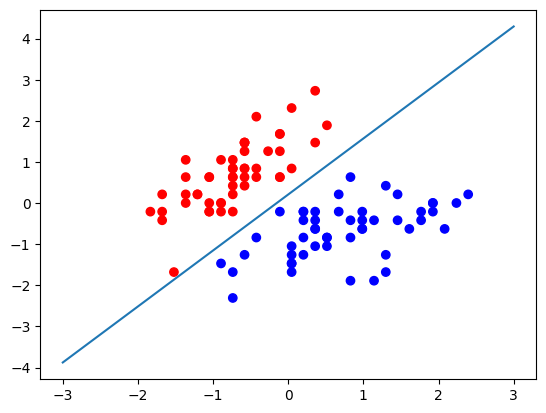

In [ ]:
# svc : 점사이 거리를 최대한 멀게 되도록 선(초평면)을 긋는다.
hyperplane_graph(x_scale, y, svc)

In [11]:
# petal length, petal width
x = iris.data[:100, 2:4]
y = iris.target[:100]

In [ ]:
scaler = StandardScaler() # 숙제용
x_scale = scaler.fit_transform(x)

In [13]:
svc = LinearSVC(dual="auto")
model = svc.fit(x_scale, y)

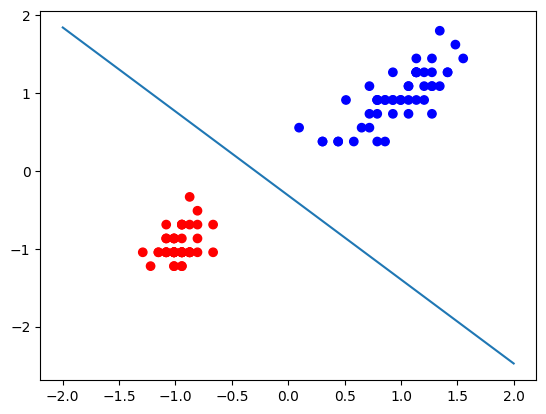

In [14]:
hyperplane_graph(x_scale, y, svc)

In [15]:
x = iris.data[50:, 2:]
y = iris.target[50:] -1

In [16]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [17]:
svc = LinearSVC(dual="auto")
model = svc.fit(x_scale, y)

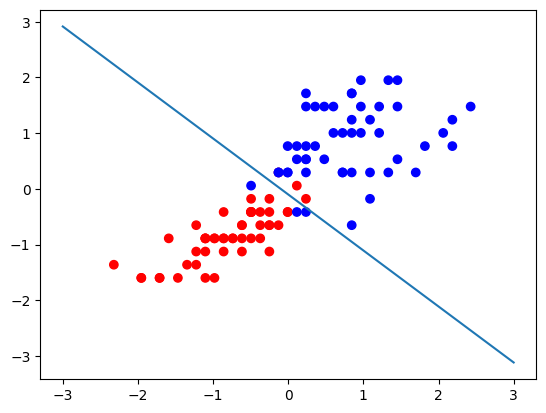

In [ ]:
hyperplane_graph(x_scale, y, svc)
# 서로 범주를 넘어와도 괜찮아 소프트마진

SVM (Support Vector Machine) : 선형 식별기 중에 높은 성능을 가진다.
 -> 2개의 클래스(y값) 가 있는 2차원 데이터 Xn으로 클래스 두개를 분류해서 마진을 극대화 시킨 후, 소프트마진/ 하드마진 으로 나눈다.

 -> 가장 가까운 점들 (Support Vector) 까지의 거리가 멀어지도록 초평면 (결정 경계, hyperplane) 을 결정.

SVM 성능 향상
- 1. 다차원 변수 적용 : 3차원 이상으로 일반화 시켜서 경계를 그린다.

- 2. 비선형 : (선형으로 데이터 분리가 불가능 할 때)
    -> 커널 값에 의한 비선형 경계를 지정
        z축을 추가해서 선형 분리한다. (RBF kernel - Radial Basis Function kernel)
